# PREPARATION

## import librairies

In [2]:
%load_ext autoreload
%autoreload 2

# Indispensables
import pandas as pd
import numpy as np
#import math
print('Panda version: %s' % pd.__version__)
print('Numpy version: %s' % np.__version__)

import sklearn
print('SCIKIT LEARN version: %s' % sklearn.__version__)
# pip install scikit-plot
import scikitplot as skplt
print('SCIKIT PLOT version: %s' % skplt.__version__)


# general
import os
from os import listdir
#from os.path import isfile, join
#from os import walk
import sys
import io
import glob
import platform
#
print(os.name, "\n", platform.system(), "\n", platform.release())
#
import argparse
#from datetime import datetime
#import h5py
#import importlib

# VISU
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
#from matplotlib.colors import LogNorm

# IMAGES
#from IPython.display import Image, IFrame
#from PIL import Image
#import rasterio
import imageio

import colorsys

print('MATPLOTLIB version: %s' % matplotlib.__version__)
print('Seaborn version: %s' % sns.__version__)

import geopandas as gpd
print('Geo Panda version: %s' % gpd.__version__)

%matplotlib inline


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Panda version: 1.0.2
Numpy version: 1.18.1
SCIKIT LEARN version: 0.22.2.post1
SCIKIT PLOT version: 0.3.7
posix 
 Darwin 
 18.0.0
MATPLOTLIB version: 3.2.0
Seaborn version: 0.10.0
Geo Panda version: 0.7.0


In [3]:
import laspy
import pcl

#print('PCL version: %s' % pcl.__version__)
print('LASPY version: %s' % laspy.__version__)


LASPY version: 1.6.0


In [4]:
from __future__ import print_function

# Machine Lerning
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

import tensorflow as tf

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation     #LSTM
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D
from keras import backend as K
from keras.callbacks import History

from keras.optimizers import SGD
from keras.regularizers import l2

print('TensorFlow: %s' % tf.__version__)
print('Keras: %s' % keras.__version__)

/Users/pl/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/pl/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/pl/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/Users/pl/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (

TensorFlow: 1.13.1
Keras: 2.3.1


## Déclaration des directories et variables

In [5]:
BASE_DIR = os.getcwd()

separe = "/"
# Laptop
if platform.system() == 'Darwin' and platform.release() == '18.7.0':
    DATA_DIR  = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA1/"
    DATA_DIR2 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA2/"
    DATA_DIR3 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/DATA3/"
    DATA_DIR9 = "/Users/pierreleisy/Data_Science/NOTEBOOK/STAGE/"
# sur IMAC
else:   #if platform.system() == 'Darwin' and platform.release() == '18.0.0':
    DATA_DIR  = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/"
    DATA_DIR2 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA2/"
    DATA_DIR3 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA3/"
    DATA_DIR9 = "/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/"
## Eurométropole
if platform.system() == 'Windows':
    DATA_DIR  = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA\\"
    DATA_DIR2 = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA2\\"
    DATA_DIR3 = "S:\\Commun\\SIG3D\\2020\\PROJETS_2020\\20039_MachineLearning\\DATA3\\"
    DATA_DIR9 = "C:\\Users\\STG3841\\Mes Documents (local)\\travail\\"
    separe = "\\"   
    
DALLE_NUM  = DATA_DIR  + "DallesNumPoints5m" + separe
DALLE_ECA  = DATA_DIR  + "DallesEcartZ5m" + separe
DALLE_POS  = DATA_DIR  + "DallesPosition5m" + separe
DALLE_NUM2 = DATA_DIR2 + "DallesNumPoints5m" + separe
DALLE_ECA2 = DATA_DIR2 + "DallesEcartZ5m" + separe
DALLE_POS2 = DATA_DIR2 + "DallesPosition5m" + separe
DALLE_NUM3 = DATA_DIR3 + "DallesNumPoints5m" + separe
DALLE_ECA3 = DATA_DIR3 + "DallesEcartZ5m" + separe
DALLE_POS3 = DATA_DIR3 + "DallesPosition5m" + separe
print("Working directory:",BASE_DIR)
print("Data ROOT directory:",DATA_DIR)

sys.path.append(DATA_DIR)
sys.path.append(os.path.join(DATA_DIR,'DallesNumPoints5m\\'))
sys.path

Working directory: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK
Data ROOT directory: /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/


['/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK',
 '/Users/pl/anaconda3/lib/python37.zip',
 '/Users/pl/anaconda3/lib/python3.7',
 '/Users/pl/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/Users/pl/anaconda3/lib/python3.7/site-packages',
 '/Users/pl/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/Users/pl/.ipython',
 '/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/',
 '/Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/DATA1/DallesNumPoints5m\\']

## création des listes d'images

In [6]:
#liste1 = [f for f in listdir(DALLE_NUM) if isfile(join(DALLE_NUM, f))]
liste_11 = [f for f in glob.glob(DALLE_NUM  + separe + "*.tif", recursive=True)]#   #only first N for test
liste_12 = [f for f in glob.glob(DALLE_ECA  + separe + "*.tif", recursive=True)]#
liste_13 = [f for f in glob.glob(DALLE_POS  + separe + "*.tif", recursive=True)]#
liste_21 = [f for f in glob.glob(DALLE_NUM2 + separe + "*.tif", recursive=True)]#   #only first N for test
liste_22 = [f for f in glob.glob(DALLE_ECA2 + separe + "*.tif", recursive=True)]#
liste_23 = [f for f in glob.glob(DALLE_POS2 + separe + "*.tif", recursive=True)]#
liste_31 = [f for f in glob.glob(DALLE_NUM3 + separe + "*.tif", recursive=True)]#   #only first N for test
liste_32 = [f for f in glob.glob(DALLE_ECA3 + separe + "*.tif", recursive=True)]#
liste_33 = [f for f in glob.glob(DALLE_POS3 + separe + "*.tif", recursive=True)]#
print(len(listdir(DALLE_NUM)), len(liste_11), len(liste_12), len(liste_13))
print(len(listdir(DALLE_NUM)), len(liste_21), len(liste_22), len(liste_23))
print(len(listdir(DALLE_NUM)), len(liste_31), len(liste_32), len(liste_33))

liste_NUM = os.listdir(DALLE_NUM)
liste_ECA = os.listdir(DALLE_ECA)
liste_POS = os.listdir(DALLE_POS)
print(len(liste_NUM), len(liste_ECA), len(liste_POS))

58771 29384 29384 29384
58771 352 352 352
58771 0 0 0
58771 58773 58768


# DONNEES

## LASPY ou autre librairies NUAGES de POINTS

In [7]:
import laspy

# Open a file in read mode:
inFile = laspy.file.File(DATA_DIR9 + "2043000_7272500_Lidar_15-16.las")
# Grab a numpy dataset of our clustering dimensions:
dataset = np.vstack([inFile.x, inFile.y, inFile.z]).transpose()
dataset.shape

(5030868, 3)

In [8]:
%%time
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step
        
#ground points grid filter
n = 100 #grid step

dataset_Z_filtered = dataset[[0]]

zfiltered = (dataset[:, 2].max() - dataset[:, 2].min())/10 

#setting height filtered from ground
print('zfiltered =', zfiltered)
xstep = (dataset[:, 0].max() - dataset[:, 0].min())/n
ystep = (dataset[:, 1].max() - dataset[:, 1].min())/n

for x in frange (dataset[:, 0].min(), dataset[:, 0].max(), xstep):
    for y in frange (dataset[:, 1].min(), dataset[:, 1].max(), ystep):
        datasetfiltered = dataset[(dataset[:,0] > x)
                             &(dataset[:, 0] < x+xstep)
                             &(dataset[:, 1] > y)
                             &(dataset[:, 1] < y+ystep)]
    if datasetfiltered.shape[0] > 0:
        datasetfiltered = datasetfiltered[datasetfiltered[:, 2]
                        >(datasetfiltered[:, 2].min()+ zfiltered)]
        if datasetfiltered.shape[0] > 0:
            dataset_Z_filtered = np.concatenate((dataset_Z_filtered,
                                             datasetfiltered))
print('dataset_Z_filtered shape', dataset_Z_filtered.shape)

zfiltered = 3.0390000000000015
dataset_Z_filtered shape (8115, 3)
CPU times: user 3min 49s, sys: 352 ms, total: 3min 50s
Wall time: 3min 50s


In [9]:
print("Examining Point Format: ")
pointformat = inFile.point_format
for spec in inFile.point_format:
    print(spec.name)

Examining Point Format: 
X
Y
Z
intensity
flag_byte
raw_classification
scan_angle_rank
user_data
pt_src_id
gps_time
red
green
blue


In [10]:
print('Z range =', dataset[:, 2].max() - dataset[:, 2].min())
print('Z max   =', dataset[:, 2].max(), 'Z min =', dataset[:, 2].min())
print('Y range =', dataset[:, 1].max() - dataset[:, 1].min())
print('Y max   =', dataset[:, 1].max(), 'Y min =', dataset[:, 1].min())
print('X range =', dataset[:, 0].max() - dataset[:, 0].min())
print('X max   =', dataset[:, 0].max(), 'X min =', dataset[:, 0].min())

Z range = 30.390000000000015
Z max   = 173.93 Z min = 143.54
Y range = 499.9900000002235
Y max   = 7272999.99 Y min = 7272500.0
X range = 499.9899999999907
X max   = 2043499.99 X min = 2043000.0


In [11]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import path

dataset = preprocessing.normalize(dataset)
dataset_Z_filtered = preprocessing.normalize(dataset_Z_filtered)

In [ ]:
clustering = DBSCAN(eps=2, min_samples=5, leaf_size=30).fit(dataset)
#clustering = DBSCAN(eps=2, min_samples=5, leaf_size=30).fit(dataset_Z_filtered)


In [ ]:
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels = clustering.labels_
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

In [ ]:
# Black removed and is used for noise instead.
fig = plt.figure(figsize=[100, 50])
ax = fig.add_subplot(111, projection=’3d’)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)

for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
    # Black used for noise.
            col = [0, 0, 0, 1]
            class_member_mask = (labels == k)
        xyz = dataset[class_member_mask & core_samples_mask]
        ax.scatter(xyz[:, 0], xyz[:, 1], xyz[:, 2], c=col, marker=”.”)
        
plt.title(‘Estimated number of cluster: %d’ % n_clusters_)
plt.show()

## TEST:  Lecture autres fichiers

In [8]:
f_lamp = DATA_DIR  + "lampadaires2.csv"
f_mobi = DATA_DIR  + "mobilier_amenagement2.csv"

lampad = pd.read_csv(f_lamp, sep=",",header=0, encoding = "utf-8")
#print(lampad.head(3))

mobilier = pd.read_csv(f_mobi, sep=",", header=0, encoding = "utf-8")
print(mobilier.shape)
mobilier2 = mobilier[mobilier['type_entite'] == 'banc_public']
print(mobilier2.shape)
mobilier2.head(3)

(24848, 15)
(10184, 15)


,gid,ident_gy,code_precision,date_leve,auteur,observ_autre,date_reco,date_modif,type_entite,z_sol,orientation,echelle_x,echelle_y,date_creation,date_maj
0,40074,NaN,rattache,2018/11/17 00:00:00,Clauss,NaN,2018/10/01 00:00:00,NaN,banc_public,139.26,NaN,NaN,NaN,2018/11/30 09:34:12,2019/05/09 16:17:16
1,192,54449499.0,rattache,2011/12/02 00:00:00,Brundaller,NaN,2019/09/01 00:00:00,NaN,banc_public,147.25,NaN,NaN,NaN,2014/01/18 14:15:10,2020/02/20 10:24:48
4,31635,NaN,rattache,2016/05/05 00:00:00,Clauss,NaN,2019/05/07 00:00:00,NaN,banc_public,141.16,NaN,NaN,NaN,2016/11/15 10:57:00,2019/10/28 15:15:04


In [9]:
#import geopandas as gpd

gdf_lamp = gpd.read_file(DATA_DIR  + "lampadaires.shp")                           
gdf_lamp.head()


,gid,ident_gy,code_preci,date_leve,auteur,date_reco,angle_g,z_sol,date_creat,date_maj,geometry
0,151,69204241.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,-42.4,158.56,2014/01/18 13:58:37.000,2018/02/12 14:08:52.000,POINT (2046319.603 7283270.659)
1,152,69204199.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,-57.6,157.94,2014/01/18 13:58:37.000,2018/02/12 14:09:00.000,POINT (2045855.457 7283330.024)
2,153,69204198.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,0.0,160.34,2014/01/18 13:58:37.000,2018/02/12 14:09:00.000,POINT (2046065.952 7283614.279)
3,154,69204197.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,-58.9,157.95,2014/01/18 13:58:37.000,2018/02/12 14:09:00.000,POINT (2046062.432 7283583.205)
4,155,69204071.0,rattache,1998/09/01 00:00:00.000,Muller C,2017/10/23 00:00:00.000,-163.4,149.73,2014/01/18 13:58:37.000,2018/02/12 14:09:24.000,POINT (2045854.604 7282886.637)


In [10]:
from shapely.geometry import Point, LineString, MultiLineString

gdf_mobi = gpd.read_file(DATA_DIR  + "mobilier_amenagement.shp")
gdf_mobi2 = gdf_mobi[gdf_mobi['type_entit'] == 'banc_public']
# Type MULTILINESTRING  gdf_mobi2.head(76)

In [11]:
#  Formes des fichiers des bancs publics
#from shapely.geometry import shape

gdf_mobi3 = gdf_mobi2.head(80)
print(gdf_mobi2.shape, gdf_mobi3.shape)

#for boundary in gdf_mobi3['geometry']:
#    print(boundary.xy)

maxi = 0
nb = 0
#for i, row in gdf_mobi2.iterrows():
for i, row in gdf_mobi3.iterrows():
    ligne = row['geometry']
    nbre = 0
    if ligne.geom_type == "LineString":
        nbre = len(ligne.coords)
        #x, y = ligne.centroid.x, ligne.centroid.y
        #print(i, x, y)
    elif ligne.geom_type == "MultiLineString":
        nb += 1
        for line in ligne:
            nbre += len(line.coords)
    #print(i, nbre, forme)
    if nbre > maxi:
        maxi = nbre
    #for pt in list(row['geometry'].coords):
        
print("Nombre maximum de points:", maxi, " avec ", nb, "MultiLineStrings")


#def getXY(pt):
#    return (pt.x, pt.y)
#centroidseries = zones['geometry'].centroid
#x,y = [list(t) for t in zip(*map(getXY, centroidseries))]

gdf_mobi3["x"] = gdf_mobi3.centroid.x
gdf_mobi3["y"] = gdf_mobi3.centroid.y
print(gdf_mobi3.shape)
gdf_mobi3.tail()

(10184, 16) (80, 16)
Nombre maximum de points: 136  avec  2 MultiLineStrings
(80, 18)


/Users/pl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/pl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,gid,ident_gy,code_preci,date_leve,auteur,observ_aut,date_reco,date_modif,type_entit,z_sol,orientatio,echelle_x,echelle_y,date_creat,date_maj,geometry,x,y
211,60,-1.996483e+09,rattache,2013/10/14 00:00:00.000,Clauss,None,2019/05/07 00:00:00.000,None,banc_public,141.34,None,None,None,2014/01/18 14:15:10.000,2019/10/28 15:15:04.000,"MULTILINESTRING ((2052210.294 7271182.357, 205...",2.052210e+06,7.271185e+06
212,61,-1.996483e+09,rattache,2013/10/14 00:00:00.000,Clauss,None,2019/05/07 00:00:00.000,None,banc_public,141.35,None,None,None,2014/01/18 14:15:10.000,2019/10/28 15:15:04.000,"MULTILINESTRING ((2052227.674 7271165.949, 205...",2.052228e+06,7.271168e+06
213,40,5.450002e+07,rattache,2013/05/23 00:00:00.000,Muller C,None,2017/03/24 00:00:00.000,None,banc_public,146.25,None,None,None,2014/01/18 14:15:10.000,2017/06/29 10:08:12.000,"LINESTRING (2046275.114 7277099.704, 2046275.2...",2.046275e+06,7.277101e+06
214,41,5.450000e+07,rattache,2013/05/23 00:00:00.000,Muller C,None,2017/03/24 00:00:00.000,None,banc_public,146.59,None,None,None,2014/01/18 14:15:10.000,2017/06/29 10:08:12.000,"LINESTRING (2046307.896 7277038.217, 2046308.9...",2.046309e+06,7.277039e+06
215,33319,NaN,None,None,Muller C,None,None,None,banc_public,137.00,None,None,None,2017/04/11 08:39:12.000,2017/04/11 08:39:12.000,"LINESTRING (2050369.780 7278163.252, 2050370.3...",2.050370e+06,7.278164e+06


In [13]:
gdf_mobi2.head(2)


,gid,ident_gy,code_preci,date_leve,auteur,observ_aut,date_reco,date_modif,type_entit,z_sol,orientatio,echelle_x,echelle_y,date_creat,date_maj,geometry
0,40074,NaN,rattache,2018/11/17 00:00:00.000,Clauss,None,2018/10/01 00:00:00.000,None,banc_public,139.26,None,None,None,2018/11/30 09:34:12.000,2019/05/09 16:17:16.000,"LINESTRING (2051288.423 7275080.683, 2051286.9..."
1,192,54449499.0,rattache,2011/12/02 00:00:00.000,Brundaller,None,2019/09/01 00:00:00.000,None,banc_public,147.25,None,None,None,2014/01/18 14:15:10.000,2020/02/20 10:24:48.000,"LINESTRING (2042622.445 7267568.482, 2042625.3..."


## lecture/creation fichier/dataframe lampes des lampadaires présents dans la dalle 1x1 km

In [14]:
# Intialisation des variables de la dalle
fich_lamp  = DATA_DIR  + "LampadairePresence_0_1_5m.asc"
fich_lamp2 = DATA_DIR2 + "listepositif.xlsx"

header = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=0, nrows=5, names=["noms","valeurs"])
n_row =  header['valeurs'][0]
n_col =  header['valeurs'][1]
xlow = header['valeurs'][2]
ylow = header['valeurs'][3]
cell_size = header['valeurs'][4]
print("Bord inférieur gauche:", xlow, ylow, n_row, n_col, cell_size)

lampadaires = pd.read_csv(fich_lamp, sep=" ", header=None, skiprows=6)
print(lampadaires.sum().head(5))
print(lampadaires.nunique().agg(['mean','count','sum']))
##################################
# reconstruit le tableau dans le bon schéma usuel
# calcule la transposee
lampadaires = lampadaires.T
# inversion des colonnes (nombre pair de colonnes, mais pas nécessaire)
lampadaires = lampadaires[lampadaires.columns[::-1]]
##################################
lampes0 = pd.DataFrame(np.reshape(lampadaires.to_numpy(), n_row*n_col))

lampes2 = pd.read_excel(fich_lamp2, header=0, skiprows=0)
print(lampadaires.shape, lampes0.shape, lampes2.shape)
#print(lampadaires.describe())
print(lampadaires.sum().sum())
lampes2.head(5)

Bord inférieur gauche: 2042500 7272000 200 200 5
0    3.0
1    4.0
2    6.0
3    2.0
4    1.0
dtype: float64
mean       1.79
count    200.00
sum      358.00
dtype: float64
(200, 200) (40000, 1) (355, 5)
357.0


,_column,_row,_overlaps,posX,posY
0,0,80,1,2042502,7272402
1,0,92,1,2042502,7272462
2,0,102,1,2042502,7272512
3,0,106,1,2042502,7272532
4,0,169,1,2042502,7272847


## rempli le dataframe lampes0 et lampes1

In [15]:
lampes0['NumI'] = lampes0.index
lampes0['NumY'] = lampes0['NumI'].mod(other=n_col)
lampes0['NumX'] = ((lampes0['NumI'] - n_row + 1) / n_row).apply(np.ceil)
#lampes = lampes.drop(['Num'], axis=1)
lampes0.rename(columns={0: 'present'}, inplace=True)
lampes0 = lampes0.astype({'present': 'int8'}, copy=False)
lampes0 = lampes0.astype({'NumY': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumI': 'int32'}, copy=False)
lampes0 = lampes0.astype({'NumX': 'int32'}, copy=False)
print(lampes0.dtypes)
#print(lampes.describe(include='all'))
lampes0['X'] = xlow + lampes0['NumX'] * cell_size
lampes0['Y'] = ylow + lampes0['NumY'] * cell_size
lampes0['nom_NUM'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_NumPoints5m.tif"
lampes0['nom_ECA'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) + "_EcartZ5m.tif"
lampes0['nom_POS'] = lampes0['X'].map(str) + "_" + lampes0['Y'].map(str) +  "_Position5m.tif"
# extraction des lampadaires
lampes1 = lampes0[lampes0['present'] > 0]
print("Dalle:", lampes0.shape, "Nbre lampadaires:", lampes1.shape)
lampes0.head()

present     int8
NumI       int32
NumY       int32
NumX       int32
dtype: object
Dalle: (40000, 9) Nbre lampadaires: (357, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
0,0,0,0,0,2042500,7272000,2042500_7272000_NumPoints5m.tif,2042500_7272000_EcartZ5m.tif,2042500_7272000_Position5m.tif
1,0,1,1,0,2042500,7272005,2042500_7272005_NumPoints5m.tif,2042500_7272005_EcartZ5m.tif,2042500_7272005_Position5m.tif
2,0,2,2,0,2042500,7272010,2042500_7272010_NumPoints5m.tif,2042500_7272010_EcartZ5m.tif,2042500_7272010_Position5m.tif
3,0,3,3,0,2042500,7272015,2042500_7272015_NumPoints5m.tif,2042500_7272015_EcartZ5m.tif,2042500_7272015_Position5m.tif
4,0,4,4,0,2042500,7272020,2042500_7272020_NumPoints5m.tif,2042500_7272020_EcartZ5m.tif,2042500_7272020_Position5m.tif


In [16]:
lampes1.head(8)

,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
52,1,52,52,0,2042500,7272260,2042500_7272260_NumPoints5m.tif,2042500_7272260_EcartZ5m.tif,2042500_7272260_Position5m.tif
92,1,92,92,0,2042500,7272460,2042500_7272460_NumPoints5m.tif,2042500_7272460_EcartZ5m.tif,2042500_7272460_Position5m.tif
170,1,170,170,0,2042500,7272850,2042500_7272850_NumPoints5m.tif,2042500_7272850_EcartZ5m.tif,2042500_7272850_Position5m.tif
249,1,249,49,1,2042505,7272245,2042505_7272245_NumPoints5m.tif,2042505_7272245_EcartZ5m.tif,2042505_7272245_Position5m.tif
281,1,281,81,1,2042505,7272405,2042505_7272405_NumPoints5m.tif,2042505_7272405_EcartZ5m.tif,2042505_7272405_Position5m.tif
303,1,303,103,1,2042505,7272515,2042505_7272515_NumPoints5m.tif,2042505_7272515_EcartZ5m.tif,2042505_7272515_Position5m.tif
307,1,307,107,1,2042505,7272535,2042505_7272535_NumPoints5m.tif,2042505_7272535_EcartZ5m.tif,2042505_7272535_Position5m.tif
405,1,405,5,2,2042510,7272025,2042510_7272025_NumPoints5m.tif,2042510_7272025_EcartZ5m.tif,2042510_7272025_Position5m.tif


In [17]:
print(lampes1.shape, lampes0.shape)
lampes1.head(240).tail(20)


(357, 9) (40000, 9)


,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
27731,1,27731,131,138,2043190,7272655,2043190_7272655_NumPoints5m.tif,2043190_7272655_EcartZ5m.tif,2043190_7272655_Position5m.tif
27747,1,27747,147,138,2043190,7272735,2043190_7272735_NumPoints5m.tif,2043190_7272735_EcartZ5m.tif,2043190_7272735_Position5m.tif
28103,1,28103,103,140,2043200,7272515,2043200_7272515_NumPoints5m.tif,2043200_7272515_EcartZ5m.tif,2043200_7272515_Position5m.tif
28125,1,28125,125,140,2043200,7272625,2043200_7272625_NumPoints5m.tif,2043200_7272625_EcartZ5m.tif,2043200_7272625_Position5m.tif
28131,1,28131,131,140,2043200,7272655,2043200_7272655_NumPoints5m.tif,2043200_7272655_EcartZ5m.tif,2043200_7272655_Position5m.tif
28193,1,28193,193,140,2043200,7272965,2043200_7272965_NumPoints5m.tif,2043200_7272965_EcartZ5m.tif,2043200_7272965_Position5m.tif
28256,1,28256,56,141,2043205,7272280,2043205_7272280_NumPoints5m.tif,2043205_7272280_EcartZ5m.tif,2043205_7272280_Position5m.tif
28393,1,28393,193,141,2043205,7272965,2043205_7272965_NumPoints5m.tif,2043205_7272965_EcartZ5m.tif,2043205_7272965_Position5m.tif
28463,1,28463,63,142,2043210,7272315,2043210_7272315_NumPoints5m.tif,2043210_7272315_EcartZ5m.tif,2043210_7272315_Position5m.tif
28464,1,28464,64,142,2043210,7272320,2043210_7272320_NumPoints5m.tif,2043210_7272320_EcartZ5m.tif,2043210_7272320_Position5m.tif


## Extraction de(s) image(s) dans un dataframe unique (à partir de imageio)

In [18]:
from keras.preprocessing.image import load_img, save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

off = 200000
if off > 40000:
    off = len(liste_11)
NN = 0
NM = NN + off

dal11 = ['nom_NUM', 'nom_ECA', 'nom_POS']
dal12 = [DALLE_NUM, DALLE_ECA, DALLE_POS]
listes1 = [liste_11, liste_12, liste_13]
listes2 = [liste_21, liste_22, liste_23]
listes3 = [liste_31, liste_32, liste_33]

data = ['data1', 'data2', 'data3']
#### Pour eviter les fichiers manquants
# Compare les deux SETS (impossible avec des listes)
for m in range(1,4):
    set_A = set(dal12[m-1] + lampes1[dal11[m-1]])
    set_B1 = set(listes1[m-1])
    set_B2 = set(listes2[m-1])
    set_B3 = set(listes3[m-1])
    set_C1 = set_A & set_B1
    set_C2 = set_B1 - set_A
    liste_C = list(set_C2)
    liste_extraite0 = list(liste_C[NN:NM]) + list(set_C1) + list(set_B2) + list(set_B3)
    if m == 1:
        mult = int(len(liste_extraite0)/len(set_C1))
        print("Coef mutiplicateur devrait-être de:", mult)
        mult = 0
        print("Coef mutiplicateur utilisé:", mult)
    liste_extraite  = list(liste_C[NN:NM]) + mult * (list(set_C1) + list(set_B2) + list(set_B3))
    #liste_extraite = list(set(list(liste_11[NN:NM]) + list(set_C1)))
    print("M:", m)
    print(len(set_A), len(set_C1), len(set_C2), len(liste_11))
    print(len(liste_extraite0), (len(liste_extraite0) - len(set_C2)), mult, len(liste_extraite))

    # creation du tenseur resultant ... merge tous les fichiers images
    fichier = DATA_DIR9 + "data_LAS_" + str(dal11[m-1]) + "_" + str(off) + "_" + str(mult) + ".npy"
    test = False
    if not(os.path.exists(fichier)):
    #if test:
    #  Ne fonctionne pas np.array(load_img(fname)) for fname in list_lamp0
        data[m-1] = np.array([np.array(imageio.imread(fname)) for fname in liste_extraite])
        data[m-1].shape
        np.save(fichier, data[m-1])

    liste_y1 = [ 0 for x in range(len(liste_C[NN:NM]))]
#    liste_y2 = [ 1 for x in range(mult * len(list(set_C1)))]
    liste_y2 = [ 1 for x in range(len(list(set_C1) + list(set_B2) + list(set_B3)))]
    liste_y = liste_y1 + liste_y2
    print(len(liste_y1), len(liste_y2), len(liste_y))


Coef mutiplicateur devrait-être de: 84
Coef mutiplicateur utilisé: 0
M: 1
357 352 29032 29384
29736 704 0 29032
29032 704 29736
M: 2
357 352 29032 29384
29736 704 0 29032
29032 704 29736
M: 3
357 352 29032 29384
29736 704 0 29032
29032 704 29736


# KERAS :  images bi-dimensionelles

In [28]:

def mse_loss(y_true, y_pred):
    # y_true and y_pred are numpy arrays of the same length.
    return ((y_true - y_pred) ** 2).mean()

def tab_result(df_a, df_b):
    # Extrait les matrices binaires en 1 seule colonne
    y_pred = pd.DataFrame(model0.predict(df_b)[:,1:])
    y_true = pd.DataFrame(df_a[:,1:])
    # création de la table
    dy = y_true.merge(y_pred, left_index=True, right_index=True, suffixes=('_true', '_pred'))
    dy['0_true'] = dy['0_true'].astype(int)
    dy['0_pred2'] = dy['0_pred'].round(0)   #arrondi à l'entier le + proche
    dy['diff'] = dy['0_true'] - dy['0_pred2']
    return dy

def lampe_results(df1, df2):
    df_10 = df1[df1['0_true'] == 0]
    df_11 = dy1[dy1['0_true'] == 1]
    df_20 = df2[df2['0_true'] == 0]
    df_21 = dy2[dy2['0_true'] == 1]
    return (df_10, df_11, df_20, df_21)

## Lecture des 3 fichiers de données

In [29]:
fichier1  = DATA_DIR9 + "data_LAS_nom_NUM_" + str(off) + "_" + str(mult) + ".npy"
data1     = np.load(fichier1)
fichier2  = DATA_DIR9 + "data_LAS_nom_ECA_" + str(off) + "_" + str(mult) + ".npy"
data2     = np.load(fichier2)
fichierY  = DATA_DIR9 + "data_LAS_nom_POS_" + str(off) + "_" + str(mult) + ".npy"
data9     = np.load(fichierY)
#print(type(data1), type(data2))
if (data1.shape[0] - data2.shape[0] != 0):
    print(data1.shape, data2.shape, data9.shape)
else:
    print(data1.shape)
# concatenation de NUM et POS
data14 = tf.expand_dims(data1, 3)
data24 = tf.expand_dims(data2, 3)
data34 = tf.expand_dims(data1, 3)
print(data14.shape) #, data24.shape, data34.shape)

data_x = tf.concat([data14, data24], 3)
#data_x = tf.concat([data14, data24, data34], 3)
#data_x = data1
taille = data_x.shape[0]
print(data_x.shape, taille)
data_y   = np.load(fichierY).reshape(taille,100)
Nomb_Input = data_x.shape

print("\n Fichiers utilisés:\n", fichier1, "\n", fichier2, "\n", fichierY)
print("Classification utiliseé:\n", fichierY, "\n")
print(data_x.shape, data_y.shape)

(29032, 10, 10)
(29032, 10, 10, 1)
(29032, 10, 10, 2) 29032

 Fichiers utilisés:
 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/data_LAS_nom_NUM_29384_0.npy 
 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/data_LAS_nom_ECA_29384_0.npy 
 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/data_LAS_nom_POS_29384_0.npy
Classification utiliseé:
 /Users/pl/Desktop/DATA_SCIENCE/NOTEBOOK/EMS/data_LAS_nom_POS_29384_0.npy 

(29032, 10, 10, 2) (29032, 100)


In [30]:
# somme sur toutes les rangées ou colonnes   
# présence de valeurs SUPERIEURES A 1 (3 valeurs à 2 ! pourquoi ?????)
df_Y = pd.DataFrame(data_y)
df_Y['lamp'] = df_Y.sum(axis=1)
df_Y['lamp2'] = df_Y[:-1].sum(axis=0)
print(df_Y.shape, df_Y['lamp'].sum())
print("Valeurs à:  0   1   ou plus)")
print(df_Y.shape[0], len(df_Y[df_Y['lamp'] == 0]), df_Y[df_Y['lamp'] == 1].shape[0], df_Y[df_Y['lamp'] > 1].shape[0])
#  Ecrase les valeurs de 2  ... pour avoir des 0 ou des 1
df_Y.loc[df_Y['lamp'] > 1] = 1
print("Valeurs à: 0 ou 1)")
print(df_Y.shape[0], len(df_Y[df_Y['lamp'] == 0]), df_Y[df_Y['lamp'] == 1].shape[0], df_Y[df_Y['lamp'] > 1].shape[0])
#df_Y[df_Y['lamp'] == 2]

(29032, 102) 0.0
Valeurs à:  0   1   ou plus)
29032 29032 0 0
Valeurs à: 0 ou 1)
29032 29032 0 0


In [21]:
df_Y.head(2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,87,88,89,90,91,92,93,94,95,96,97,98,99,lamp,lamp2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
lampes0.head(2)

,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS
0,0,0,0,0,2042500,7272000,2042500_7272000_NumPoints5m.tif,2042500_7272000_EcartZ5m.tif,2042500_7272000_Position5m.tif
1,0,1,1,0,2042500,7272005,2042500_7272005_NumPoints5m.tif,2042500_7272005_EcartZ5m.tif,2042500_7272005_Position5m.tif


In [31]:
# lampes0 autre DataFrame avec les indice de présence des lampadaires ... CORRECTS ? ... pas cohérent
df_tot = df_Y.merge(lampes0, left_index=True, right_index=True)
df_tot['diff'] = df_tot['present'] - df_tot['lamp']
print(df_tot.shape, lampes0.shape,df_Y.shape )
test = True
if test:
    print("diff =  2:", df_tot[df_tot['diff'] ==  2].count(axis=0)[0])
    print("diff =  1:", df_tot[df_tot['diff'] ==  1].count(axis=0)[0])
    print("diff =  0:", df_tot[df_tot['diff'] ==  0].count(axis=0)[0])
    print("diff = -1:", df_tot[df_tot['diff'] == -1].count(axis=0)[0])
    print("diff = -2:", df_tot[df_tot['diff'] == -2].count(axis=0)[0])
df_tot['diff'].describe()


(29032, 112) (40000, 9) (29032, 102)
diff =  2: 0
diff =  1: 240
diff =  0: 28792
diff = -1: 0
diff = -2: 0


count    29032.000000
mean         0.008267
std          0.090547
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: diff, dtype: float64

In [32]:
df_tot[df_tot['diff'] == -1]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,97,98,99,lamp,lamp2,present,NumI,NumY,NumX,X,Y,nom_NUM,nom_ECA,nom_POS,diff


In [33]:
df_Y.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,...,87,88,89,90,91,92,93,94,95,96,97,98,99,lamp,lamp2
count,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,...,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,29032.0,100.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Séparation Train - Test 

In [64]:
y = df_Y[["lamp"]]
y_binary = to_categorical(y)

len0 = df_Y[df_Y['lamp'] == 0].shape[0]
len1 = df_Y.shape[0] - len0

df_test = pd.DataFrame(y_binary)
print(len0, len1, y.shape, y_binary.shape, df_test.shape)

print(len0, len0+int(len1*0.8), int(len0*0.8), int(len1*0.8))


29032 0 (29032, 1) (29032, 1) (29032, 1)
29032 29032 23225 0


In [68]:
#########   problemes d'arrondis   ????  #######
#### pas le meme nombre de lignes pour les 2 manières différentes d'extraire les lignes  ????
#y0 = df_testY.iloc[:int(len0*0.8),len0:len0+int(len1*0.8)]
#y1 = df_testY.iloc[int(len0*0.8):len0,len0+int(len1*0.8):len0+len1]
df_testY = pd.DataFrame(y_binary)
y0a = df_test.iloc[:int(len0*0.8),:]
y0b = df_test.iloc[len0:len0+int(len1*0.8),:]
y0  = pd.concat([y0a, y0b])
y1a = df_test.iloc[int(len0*0.8):len0,:]   
y1b = df_test.iloc[len0+int(len1*0.8):len0+len1,:]   
y1  = pd.concat([y1a, y1b])

print(y.shape, y0.shape, y1.shape)
y0 = to_categorical(y0)
y1 = to_categorical(y1)
print(len(y0[1]), len(y1[1]))

data_x0a = data_x[:int(len0*0.8)]
data_x0b = data_x[len0:len0+int(len1*0.8)]
data_x1a = data_x[int(len0*0.8):len0]
data_x1b = data_x[len0+int(len1*0.8):]
print(data_x0a.shape, data_x0b.shape,data_x1a.shape, data_x1b.shape)

#data_x0 = np.concatenate(data_x0a, data_x0b, axis=1)
data_x0 = tf.keras.backend.concatenate((data_x0a, data_x0b), axis=0)
data_x1 = tf.keras.backend.concatenate((data_x1a, data_x1b), axis=0)
print(data_x0.shape,data_x1.shape)


(29032, 1) (23225, 1) (5807, 1)
2 2
(23225, 10, 10, 2) (0, 10, 10, 2) (5807, 10, 10, 2) (0, 10, 10, 2)
(23225, 10, 10, 2) (5807, 10, 10, 2)


In [69]:
# Charge et split les données
###############   TODO      ###############
####### fonctionne avec les 2 cubes/images 
X = data_x
####### Si ne fonctionne pas avec les 2 cubes/images 
# X = data1
print("Dimensions X:", X.shape)
##############################################
#####   calcul de la position de la lampe dans le carré N
###  Passage mode binaire à une liste de 100
############
# Manière 1 de 
y = liste_y
# Manière 2 ... directe à partir des 3 mêmes fichiers 10x10
y = df_Y[["lamp"]]

y_binary = to_categorical(y, num_classes=2, dtype='int')

print("Dimensions Y:", y_binary.shape, len(y), y0.shape, y1.shape)
#
# y = data_y
# print(y.shape)
#############################

#y_binary

Dimensions X: (29032, 10, 10, 2)
Dimensions Y: (29032, 2) 29032 (23225, 2) (5807, 2)


In [71]:


# tfds   tensorflow dataset splitting
# test_split, valid_split, train_split = tfds.Split.TRAIN.subsplit([10, 15, 75])
# PYTORCH   torchtext.data.Dataset
# split(split_ratio=0.7, stratified=False, strata_field='label', random_state=None

methode = 'test3'
#methode = 'SKLEARN'

if methode == 'test':
    all = tf.data.Dataset.from_tensor_slices(X).shuffle(10, reshuffle_each_iteration=False)
    n_row = int(X.shape[0] * 0.8)
    train_data, test_data     = X[:n_row,:,:,:], X[n_row:,:,:,:]
    train_labels, test_labels = y_binary[:n_row,:], y_binary[n_row:,:]
    
if methode == 'test2':
    len0 = df_Y[df_Y['lamp'] == 0].shape[0]
    len1 = df_Y.shape[0] - len0
    
    train_data, test_data = tf.split(X, [n_row1, n_row2], 0)
    train_labels, test_labels = tf.split(y_binary, [n_row1, n_row2], 0)
    
if methode == 'test3':
    train_data, test_data     = (data_x0, data_x1)
    train_labels, test_labels = (y0, y1)

if methode == 'shuffle':
    fraction = 20
    #all = tf.data.Dataset.from_tensor_slices(list(range(1, 21))).shuffle(10, reshuffle_each_iteration=False)
    #test_data = all.enumerate().filter(lambda x,y: x % int(100/fraction) == 0).map(lambda x,y: y)
    
# dim = len(keras.backend.int_shape(X))
# if dim = 2:
# Avec SKLEARN
if methode == 'SKLEARN':
    train_data, test_data, train_labels, test_labels = train_test_split(
        X, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
#        X, y, test_size=0.2, random_state=42, stratify=y)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print("Train et Test:", train_data.shape, len(train_labels), test_data.shape, len(test_labels))

#train_data = np.expand_dims(train_data, axis=3)
#test_data = np.expand_dims(test_data, axis=3)

#### Ce n'est plus nécessaire si X est un Tenseur 4D
#train_data = train_data.reshape(train_data.shape[0], 10, 10, 1)
#test_data  = test_data.reshape(test_data.shape[0], 10, 10, 1)

#print(train_data.shape, train_labels.shape, test_data.shape, test_labels.shape)
print(train_data.shape, len(train_labels), test_data.shape, len(test_labels))
print(y0.shape, y1.shape)

Train et Test: (23225, 10, 10, 2) 23225 (5807, 10, 10, 2) 5807
(23225, 10, 10, 2) 23225 (5807, 10, 10, 2) 5807
(23225, 2) (5807, 2)


## Modèles CNN 2D

### tensorboard plot diagramme

### ou tikz in latex

In [72]:
print(train_data.shape, train_labels.shape, df_Y.shape, y_binary.shape, len(y))

# 2) Train CONVNET on the MNIST dataset
dim = len(keras.backend.int_shape(train_data))
print("Dimension:", dim)

epochs = 20   # 30 à 50 ou 120-150-200 ???
#  steps PROBLEMES si différent de 1 pour les derniers plots
batch_size = 1    # 64 
#ratio = 10 * 401 / 70
ratio = 10 * 20000 / 70
poids_class = {0: 1., 1: ratio}
if dim == 2:
    input_shape = (10, 10)
if dim == 4:
    input_shape = (10, 10, 2)
    #input_shape = (10, 10, 1)

filters = (5,5)
strides=(1,1)
pool_size=(2,2)

model2 = Sequential([
    Conv2D(6, filters, padding="same", strides=strides, input_shape=input_shape),
    MaxPooling2D(pool_size=pool_size),
    Conv2D(16, filters, padding="same", strides=strides),
    MaxPooling2D(pool_size=pool_size),
    Flatten(),
    Dense(120, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='sigmoid')   #  'softmax'
    #Dense(2, activation='softmax')
])

#model2.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),
#              metrics=['accuracy'])
model2.compile(loss=keras.losses.binary_crossentropy, optimizer=keras.optimizers.Adadelta(),
#model2.compile(loss=keras.losses.mse, optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#  si TENSOR = 2D
if dim == 2:
    history2 = model2.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, 
                          class_weight=poids_class,  # ou   'balanced'
          verbose=1, validation_data=(test_data, test_labels))
    score = model2.evaluate(test_data, test_labels, verbose=0)
elif dim == 4:
#    history2 = model2.fit_generator(train_data, train_labels, verbose=1)      
    history2 = model2.fit(train_data, train_labels, epochs=epochs, verbose=1, 
#                          # class_weight=poids_class,   #  ValueError:  NOT supported for 3+ dimensional targets
                        validation_freq=.33, steps_per_epoch=2)
    score = model2.evaluate(test_data, test_labels, steps=3, verbose=0)
else:
    print("WRONG tensor dimension inputs ....")

print('Test loss:', score[0])
print('Test accuracy:', score[1])

(23225, 10, 10, 2) (23225, 2) (29032, 102) (29032, 2) 29032
Dimension: 4
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
2/2 [==============================] - 5s 2s/step - loss: 0.7556 - accuracy: 0.5017
Epoch 2/20
2/2 [==============================] - 2s 1s/step - loss: 0.5441 - accuracy: 0.8380
Epoch 3/20
2/2 [==============================] - 2s 1s/step - loss: 0.3530 - accuracy: 0.9686
Epoch 4/20
2/2 [==============================] - 2s 1s/step - loss: 0.1998 - accuracy: 0.9946
Epoch 5/20
2/2 [==============================] - 2s 999ms/step - loss: 0.1143 - accuracy: 0.9984
Epoch 6/20
2/2 [==============================] - 2s 994ms/step - loss: 0.0715 - accuracy: 0.9994
Epoch 7/20
2/2 [==============================] - 2s 1s/step - loss: 0.0490 - accuracy: 0.9997
Epoch 8/20
2/2 [==============================] - 2s 1000ms/step - loss: 0.0359 - accuracy: 0.9998
Epoch 9/20
2/2 [==============================] - 2s 996ms/step - loss: 0.0270 - accuracy: 0.9999
Epoch 10/20

### Sommaire

In [100]:
model2.summary()

# model.save_weights('file.h5')
# avec le model construit + les poids
# model.load_weights('file.h5')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 10, 10, 6)         306       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 6)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 16)          2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               7800      
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)              

### Figures

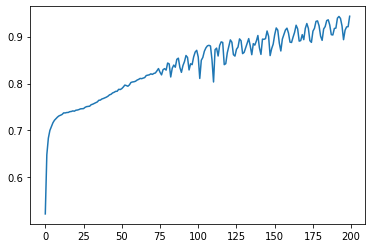

In [212]:
#history0.history
# plot metrics
#_ = plt.plot(history2.history['binary_accuracy'])
_ = plt.plot(history2.history['accuracy'])
_ = plt.show()


dict_keys(['loss', 'accuracy'])
0 blue [[0.7273275256156921, 0.6692314147949219, 0.6559347808361053, 0.6470852494239807, 0.6399151384830475, 0.6321963965892792, 0.6265157759189606, 0.620256096124649, 0.6148008704185486, 0.6079209744930267, 0.6013526022434235, 0.5936937034130096, 0.584732711315155, 0.5779654681682587, 0.5725230872631073, 0.5721116960048676, 0.5670521855354309, 0.5603864192962646, 0.555412620306015, 0.551945835351944, 0.5467217862606049, 0.5430938601493835, 0.5375773310661316, 0.5321544706821442, 0.5296571850776672, 0.5263238251209259, 0.5193204581737518, 0.515046626329422, 0.5133166313171387, 0.5141187310218811, 0.5031861662864685, 0.5007932484149933, 0.5004803091287613, 0.49969787895679474, 0.49412426352500916, 0.48926274478435516, 0.48721860349178314, 0.48394304513931274, 0.4817347824573517, 0.48115305602550507, 0.4760419577360153, 0.47329163551330566, 0.46840983629226685, 0.46955670416355133, 0.463433176279068, 0.46181541681289673, 0.4579727500677109, 0.4546338915824

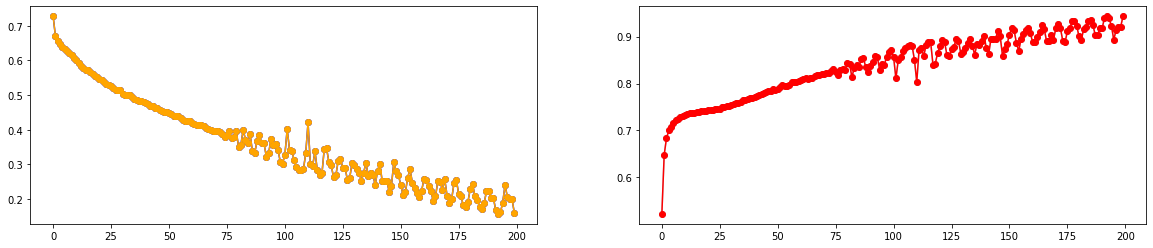

In [213]:
print(history2.history.keys())
coul = ["blue", "lightblue", "orange", "red"]

fig = plt.figure(figsize=(20,4))
_ = plt.subplot(1,2,1)
for i in range(0,4,2):
    print(i,coul[i], list(history2.history.values()))
    #_ = plt.plot(list(history2.history.values())[i],'k-o', color=coul[i])
    _ = plt.plot(list(history2.history.values())[0],'k-o', color=coul[i])
_ = plt.subplot(1,2,2)
for j in range(1,4,2):
    _ = plt.plot(list(history2.history.values())[1],'k-o', color=coul[j])
    

Test loss: 0.1322801262140274
Test accuracy: 0.9593383073806763
[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(7919, 2) <class 'pandas.core.frame.DataFrame'>


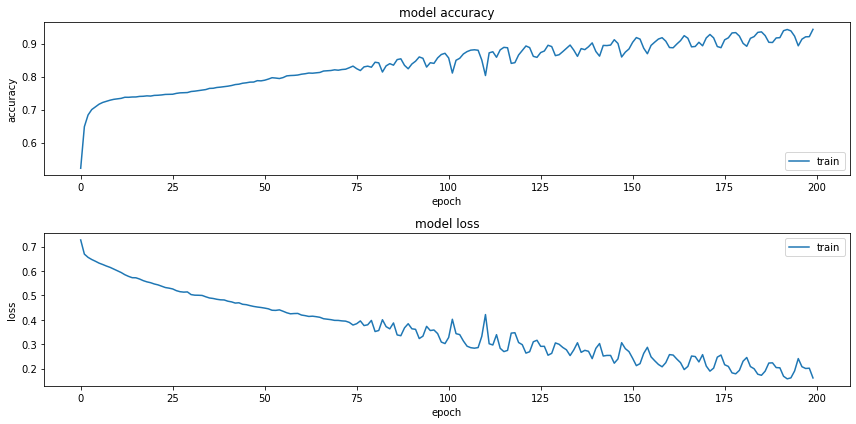

In [214]:
# RESULTATS

if dim == 2:
    score = model2.evaluate(test_data, test_labels, verbose=0, batch_size=batch_size)
    classes = model2.predict(test_data, batch_size=batch_size)
    predictions = model2.predict(test_data[:10])
if dim == 4:
    score = model2.evaluate(test_data, test_labels, verbose=0, steps=batch_size)
    classes = model2.predict(test_data, steps=batch_size)
    predictions = model2.predict(test_data[:100], steps=batch_size)
    
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# predictions
 #predictions = model2.predict_classes(test_data[:10])
print(np.argmax(predictions, axis=1))
print(test_labels.shape, type(test_labels))

######## TypeError: '(slice(None, 100, None), slice(0, 1, None))' is an invalid key
#print(test_labels[:100,0:1])

# PLOTS
fig = plt.figure(figsize=(12,6))
_ = plt.subplot(2,1,1)
_ = plt.plot(history2.history['accuracy'])
if dim == 2:
    _ = plt.plot(history2.history['val_accuracy'])
_ = plt.title('model accuracy')
_ = plt.xlabel('epoch')
_ = plt.ylabel('accuracy')
_ = plt.legend(['train','test'], loc='lower right')

_ = plt.subplot(2,1,2)
_ = plt.plot(history2.history['loss'])
if dim == 2:
    _ = plt.plot(history2.history['val_loss'])
_ = plt.title('model loss')
_ = plt.xlabel('epoch')
_ = plt.ylabel('loss')
_ = plt.legend(['train','test'], loc='upper right')

_ = plt.tight_layout()
_ = fig


### Matrice de confusion

In [215]:
print(data_x0.shape, y0[:].shape, y0[1:].shape)
y0[:]


(31673, 10, 10, 2) (31673, 2) (31672, 2)


,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
37478,0.0,1.0
37479,0.0,1.0
37480,0.0,1.0
37481,0.0,1.0


In [216]:
print(test_data.shape, test_labels[:].shape)


(7919, 10, 10, 2) (7919, 2)


start tensor 4D
Echantillon Train: (31673, 10, 10, 2) 31673 31673
Echantillon Test: 7919 7919
(31673,) (31673, 1) (7919,) (7919, 1)
SOMME réelle:  8424.0 2121.0
SOMME prédite: 8625.0 2192.0
Pourcentages:
Train: 102.39 %
Test: 103.35 %


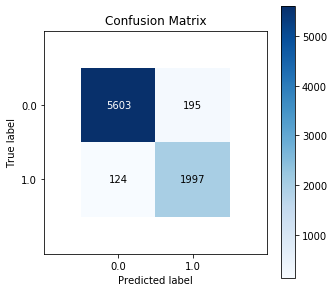

In [217]:
from sklearn.metrics import confusion_matrix
#       pip install scikit-plot
import scikitplot as skplt

# transforme les matrice en listes d'entiers binaires (0 ou 1)
if dim == 2:
    print("start matrice 2D")
    Y01 = pd.DataFrame(model2.predict(train_data, steps=batch_size)[:,1:])[0].round(0).tolist()
    Y11 = pd.DataFrame(model2.predict(test_data, steps=batch_size)[:,1:])[0].round(0).tolist()
    Y00 = pd.DataFrame(train_labels[:,1:])[0].tolist()
    Y10 = pd.DataFrame(test_labels[:,1:])[0].tolist()
    
if dim == 4:
    print("start tensor 4D")
    Y01 = model2.predict(train_data, steps=batch_size)[:].round(0).tolist()
    Y11 = model2.predict(test_data, steps=batch_size)[:].round(0).tolist()
    Y00 = train_labels[:]
    Y10 = test_labels[:]
#    Y10 = test_labels[1:].numpy().tolist()

print("Echantillon Train:", train_data.shape, len(Y00), len(Y01))
#confusion_matrix(Y01, Y00)

print("Echantillon Test:", len(Y10), len(Y11))
#confusion_matrix(Y11, Y10)
if dim == 2:
    y_reel = pd.Series(Y10, name='Reel_test')
    y_pred = pd.Series(Y11, name='Prédit_test')
if dim == 4:
#    y_reel = test_labels[1:].numpy()
    y_reel0 = train_labels[1]
    y_pred0 = model2.predict(train_data, steps=batch_size).round(0)[:,1:]
    y_reel = test_labels[1]
    y_pred = model2.predict(test_data, steps=batch_size).round(0)[:,1:]

if dim == 2:
   #df_confusion = pd.crosstab(y_reel, y_pred, rownames=['Reel_test'], colnames=['Predit_test'], margins=True)
   print("\n", df_confusion)

print(y_reel0.shape, y_pred0.shape, y_reel.shape, y_pred.shape,)
print("SOMME réelle: ", y_reel0.sum(), y_reel.sum())
print("SOMME prédite:", y_pred0.sum(), y_pred.sum())

print("Pourcentages:")
print("Train:", round(y_pred0.sum() / y_reel0.sum()* 100, 2),"%")
print("Test:", round(y_pred.sum() / y_reel.sum()* 100, 2),"%")
#
##################
#fig, ax = matplotlib.pyplot.subplots(1)
#ax.set_yticks([0, 1])
#ax.set_yticklabels(["0", "1"])
##################
#scikitplot.metrics.plot_confusion_matrix(
#y_true, y_pred, labels=None, true_labels=None, pred_labels=None, 
#title=None, normalize=False, hide_zeros=False, hide_counts=False, 
#x_tick_rotation=0, ax=None, figsize=None, cmap='Blues', 
#title_fontsize='large', text_fontsize='medium')
ax = skplt.metrics.plot_confusion_matrix(y_reel, y_pred,
            figsize=(5,5), hide_counts=False )

ax.set(xlim=(-1, 2), ylim=(2, -1))
#ax.set(xlim=(0, 1), ylim=(1,0))
#ax.set_yticks([0, 1])
#print("AXES:", ax)
plt.show()
#
#df_conf_norm = df_confusion / df_confusion.sum(axis=1)
#print("\n", df_conf_norm)
#df_conf_norm = df_confusion.div(df_confusion.sum(axis=1), axis=0)
#print("\n", df_conf_norm)

#skplt.metrics.plot_roc(y_test, y_pred)
#plt.show()
#_ = sns.heatmap(df_confusion, annot=True)
#plt.show()
#_ = sns.heatmap(df_conf_norm, annot=True)
#plt.show()

In [218]:
#print(y_reel)
print(y_reel0.shape, y_pred0.shape, y_reel.shape, y_pred.shape,)
print("SOMME réelle: ", y_reel0.sum(), y_reel.sum())
print("SOMME prédite:", y_pred0.sum(), y_pred.sum())

print("Pourcentages:")
print("Train:", round(y_pred0.sum() / y_reel0.sum()* 100, 2),"%")
print("Test:", round(y_pred.sum() / y_reel.sum()* 100, 2),"%")

df_res0 = pd.DataFrame(y_reel0).reset_index().rename(columns={1: "reel"})
df_res0['pred'] = pd.DataFrame(y_pred0)
df_res0['diff'] = df_res0['pred'] - df_res0['reel']
val0_00 = len(df_res0[(df_res0['pred'] == 0) & (df_res0['reel'] == 0)])
val0_01 = len(df_res0[(df_res0['pred'] == 0) & (df_res0['reel'] == 1)])
val0_10 = len(df_res0[(df_res0['pred'] == 1) & (df_res0['reel'] == 0)])
val0_11 = len(df_res0[(df_res0['pred'] == 1) & (df_res0['reel'] == 1)])

print("\n Pourcentages:")
print('Valeurs:', val0_00, val0_01, val0_10, val0_11)
print("Train 0:", round(val0_00 / (val0_00+val0_10)* 100, 2),"%")
print("Train 1: ", round(val0_11 / (val0_01+val0_11)* 100, 2),"%")

df_res = pd.DataFrame(y_reel).reset_index().rename(columns={1: "reel"})
df_res['pred'] = pd.DataFrame(y_pred)
df_res['diff'] = df_res['pred'] - df_res['reel']
val_00 = len(df_res[(df_res['pred'] == 0) & (df_res['reel'] == 0)])
val_01 = len(df_res[(df_res['pred'] == 0) & (df_res['reel'] == 1)])
val_10 = len(df_res[(df_res['pred'] == 1) & (df_res['reel'] == 0)])
val_11 = len(df_res[(df_res['pred'] == 1) & (df_res['reel'] == 1)])

print("Pourcentages:")
print('Valeurs:', val_00, val_01, val_10, val_11)
print("Test 0:", round(val_00 / (val_00+val_10)* 100, 2),"%")
print("Test 1: ", round(val_11 / (val_01+val_11)* 100, 2),"%")

(31673,) (31673, 1) (7919,) (7919, 1)
SOMME réelle:  8424.0 2121.0
SOMME prédite: 8625.0 2192.0
Pourcentages:
Train: 102.39 %
Test: 103.35 %

 Pourcentages:
Valeurs: 22557 491 692 7933
Train 0: 97.02 %
Train 1:  94.17 %
Pourcentages:
Valeurs: 5603 124 195 1997
Test 0: 96.64 %
Test 1:  94.15 %


# KERAS hyperparametres

In [301]:
from sklearn.model_selection import GridSearchCV

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

def create_model(neurons=1, optimizer='adam', dropout_rate=0.0, learn_rate=0.01, momentum=0, 
                 init_mode='uniform', activation='relu', dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(neurons, kernel_initializer=init_mode, input_dim=8, activation=activation)'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# fix random seed for reproducibility
seed = 42
numpy.random.seed(seed)
# load dataset

dataset = 
# split into input (X) and output (Y) variables
X = dataset
Y = dataset

# create model
model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=10, dropout_rate=0.2, verbose=0)

              
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
weight_constraint = [i for i in range (1, 6, 1)]
dropout_rate = [i/10 for i in range (0, 10, 1)]
neurons = [1, 5, 10, 15, 20, 25, 30]

param_grid = dict(neurons=neurons, learn_rate=learn_rate, momentum=momentum, optimizer=optimizer, 
                init_mode=init_mode, batch_size=batch_size, epochs=epochs, activation=activation,
                dropout_rate=dropout_rate, weight_constraint=weight_constraint)
#  score = ???
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)   # n_jobs=-1  parallisation
grid_result = grid.fit(X, Y)

# summarize results ==>  best_score et best_params_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

SyntaxError: invalid syntax (<ipython-input-301-ded477e1019e>, line 19)